# Scraping

In [ ]:
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup

## Scraping Function

In [ ]:
# Obtain DataFrame with Transfermarket Web Data

def info_transfermarket2(link):
    
    # Web site and parsing
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.169 Safari/537.36'}
    page = requests.get(link, headers=headers)
    soup = BeautifulSoup(page.content, 'html.parser')
    
    # Locate table in html 
    tabla2 = soup.find_all('table', class_ = 'items')
    
    # Locate tr elements in table
    lista = []
    for i in tabla2:
        for j in i.find_all('tr'):
            lista.append(j)
    
    # Locate all td elements then append them into a list by player
    players = []
    players_temp = []
    for x in lista:
        for y in x.find_all('td'):
            players_temp.append(y.text)
        players.append(players_temp)
        players_temp = []
   
    # Delete empty rows.
    players_stats = []
    for z in players:
        if len(z) > 0:
            players_stats.append(z)
    
    # Get all list with real values ( first Value [0] and multiples of 3)
    players_stats_ = []
    i = 0
    for j in players_stats:
        players_stats_.append(players_stats[i])
        i += 3
        if i >= 75:
            break
    
    # DElete unnecesary values.
    indecies_to_delete = [7, 6, 4, 2, 1, 0]
    for i in range(len(players_stats_)):
        for index in indecies_to_delete:
            del players_stats_[i][index]
    
    # Create DataFrame structure
    columns = ['Jugador', 'Edad', 'Valor de mercado', 'Alineaciones', 'Goles', 'Goles en Propia', 'Asistencias', 'Tarjetas Amarillas', 'Segundas Tarjetas Amarillas', 'Tarjetas Rojas', 'Cambios (Entra)', 'Cambios (Sale)']
    index = list(range(1, len(players_stats_) + 1))
    
    # Generate DataFrames
    jugadores_precio = pd.DataFrame(players_stats_, columns = columns)

    return jugadores_precio

## Execution

In [ ]:
# URL only UEFA Forwards
url = 'https://www.transfermarkt.es/spieler-statistik/wertvollstespieler/marktwertetop?land_id=0&ausrichtung=Sturm&spielerposition_id=14&altersklasse=alle&jahrgang=0&kontinent_id=6&plus=1'
df_uefa = info_transfermarket2(url)

In [ ]:
# URL only forwards
url = 'https://www.transfermarkt.es/spieler-statistik/wertvollstespieler/marktwertetop?land_id=0&ausrichtung=Sturm&spielerposition_id=14&altersklasse=alle&jahrgang=0&kontinent_id=0&plus=1'
df = info_transfermarket2(url)

# Obtain data from all related web tables
for i in range(2,21):
    url_page = url + '&page='+ str(i)
    df_1 = info_transfermarket2(url_page)
    df = df.append(df_1)
    

In [ ]:
# Export table into CSV
df.to_csv('transfer_delanteros(DC).csv', index = False)

## Scraping by Nationality

In [ ]:
# URL Only Forwards from UEFA Spain
url = 'https://www.transfermarkt.es/spieler-statistik/wertvollstespieler/marktwertetop?land_id=157&ausrichtung=Sturm&spielerposition_id=14&altersklasse=alle&jahrgang=0&kontinent_id=6&plus=1'
df_uefa_esp =info_transfermarket2(url)

# Obtain data from all related web tables
for i in range(2,21):
    url_page = url + '&page='+ str(i)
    df_1 = info_transfermarket2(url_page)
    df_uefa_esp = df_uefa_esp.append(df_1)

In [ ]:
# URL Only Forwards UEFA Germany
url = 'https://www.transfermarkt.es/spieler-statistik/wertvollstespieler/marktwertetop?land_id=40&ausrichtung=Sturm&spielerposition_id=14&altersklasse=alle&jahrgang=0&kontinent_id=6&plus=1'
df_uefa_ale = info_transfermarket2(url)

# Obtain data from all related web tables
for i in range(2,21):
    url_page = url + '&page='+ str(i)
    df_1 = info_transfermarket2(url_page)
    df_uefa_ale = df_uefa_ale.append(df_1)

In [ ]:
# URL Only Forwards UEFA France
url = 'https://www.transfermarkt.es/spieler-statistik/wertvollstespieler/marktwertetop?land_id=50&ausrichtung=Sturm&spielerposition_id=14&altersklasse=alle&jahrgang=0&kontinent_id=6&plus=1'
df_uefa_fra = info_transfermarket2(url)

# Obtain data from all related web tables
for i in range(2,21):
    url_page = url + '&page='+ str(i)
    df_1 = info_transfermarket2(url_page)
    df_uefa_fra = df_uefa_fra.append(df_1)

In [ ]:
# URL Only Forwards UEFA Italy
url = 'https://www.transfermarkt.es/spieler-statistik/wertvollstespieler/marktwertetop?land_id=75&ausrichtung=Sturm&spielerposition_id=14&altersklasse=alle&jahrgang=0&kontinent_id=6&plus=1'
df_uefa_ita = info_transfermarket2(url)

for i in range(2,21):
    url_page = url + '&page='+ str(i)
    df_1 = info_transfermarket2(url_page)
    df_uefa_ita = df_uefa_ita.append(df_1)

In [ ]:
# URL Only Forwards UEFA England
url = 'https://www.transfermarkt.es/spieler-statistik/wertvollstespieler/marktwertetop?land_id=189&ausrichtung=Sturm&spielerposition_id=14&altersklasse=alle&jahrgang=0&kontinent_id=6&plus=1'
df_uefa_ing = info_transfermarket2(url)

for i in range(2,21):
    url_page = url + '&page='+ str(i)
    df_1 = info_transfermarket2(url_page)
    df_uefa_ing = df_uefa_ing.append(df_1)

In [ ]:
# URL Only Forwards from UEFA Portugal
url ='https://www.transfermarkt.es/spieler-statistik/wertvollstespieler/marktwertetop?land_id=136&ausrichtung=Sturm&spielerposition_id=14&altersklasse=alle&jahrgang=0&kontinent_id=6&plus=1'
df_uefa_por = info_transfermarket2(url)

for i in range(2,21):
    url_page = url + '&page='+ str(i)
    df_1 = info_transfermarket2(url_page)
    df_uefa_por = df_uefa_por.append(df_1)

# Append All DataFrames

In [ ]:
# DataFrame Structure
df1 = pd.DataFrame(columns= ['Jugador', 'Edad', 'Valor de mercado', 'Alineaciones', 'Goles',
       'Goles en Propia', 'Asistencias', 'Tarjetas Amarillas',
       'Segundas Tarjetas Amarillas', 'Tarjetas Rojas', 'Cambios (Entra)',
       'Cambios (Sale)'])

In [ ]:
# Append DataFrames
df1 = df1.append(df_uefa_esp)
df1 = df1.append(df_uefa_ale)
df1 = df1.append(df_uefa_fra)
df1 = df1.append(df_uefa_ita)
df1 = df1.append(df_uefa_ing)
df1 = df1.append(df_uefa_por)

In [ ]:
# Export DataFrame to CSV file
df.to_csv('C:\Users\jmcer\OneDrive\Escritorio\EAE Asignaturas\Data Science\Parte 2\Trabajo\transfermkt.csv')

In [ ]:
df1.to_csv('transfer_uefa.csv', index = False)

# Set Linear Regression





## Libraries and Functions

In [ ]:
from keras import models
from keras import layers
from keras.utils import to_categorical
import keras
import pandas as pd
from sqlalchemy import create_engine
import datetime as dt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

import numpy as np

In [ ]:
# Visualize training execution
def train_validation(history, y_train):

  # Obtain train histoy params
  history_dict = history.history
  loss_values = history_dict['loss']
  val_loss_values = history_dict['val_loss']
  accuracy = history_dict['mae']
  val_accuracy = history_dict['val_mae']
  
  # Accuracy
  acc = (np.mean(y_train) - np.sqrt(history.history['loss'][-1])) * 100 / np.mean(y_train) 

  # Set visual params
  epochs = range(1, len(loss_values) + 1)
  fig, ax = plt.subplots(1, 2, figsize=(14, 6))

  # Print MAE
  print('Diferencia MAE: ', history.history['mae'][-1])

  # Plot the model accuracy (MAE) vs Epochs
  ax[0].plot(epochs, accuracy, 'bo', label='Training accuracy')
  ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
  ax[0].set_title('Training & Validation MAE', fontsize=16)
  ax[0].set_xlabel('Epochs', fontsize=16)
  ax[0].set_ylabel('Accuracy', fontsize=16)
  ax[0].legend()

  # Print Other params
  print('Diferencia MSE: ', np.sqrt(history.history['loss'][-1]) )
  print('Media de KWh en este Cluster:', np.mean(y_train) )
  print('Accuracy : %.2f ' % (acc) )

  # Plot the loss vs Epochs
  ax[1].plot(epochs, loss_values, 'bo', label='Training loss') 
  ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
  ax[1].set_title('Training & Validation Loss (MSE)', fontsize=16)
  ax[1].set_xlabel('Epochs', fontsize=16)
  ax[1].set_ylabel('Loss', fontsize=16)
  ax[1].legend()

In [ ]:
# Visualize predictions
def scatter_pred (y_test,y_pred, history):

  # Obtain test values and error params
  y_t = np.array(y_test)
  err = 0
  por = 0
  for i in range(len(y_t)):
    err += np.abs(y_t[i] - y_pred[i])
    por += np.abs((y_t[i] - y_pred[i])/y_t[i])
  
  err = err/len(y_pred)
  por = por/len(y_pred)
  
  # Print Error Params
  print('Error medio abs : %.2f , Error porcent. absol: %.3f ' % (err,por))
  acc = np.abs( (np.mean(y_test) - np.sqrt(history.history['loss'][-1])) * 100 / np.mean(y_test))  
  history_dict = history.history
  print('Error Cuadrático :',np.sqrt(history1.history['loss'][-1]))
  print('Porcentaje error media- cuadrático : %.2f' % (acc) )

  # Plot regression Figure of Predictions vs Tests
  fig, ax = plt.subplots()
  ax.scatter(y_test, y_pred)
  ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
  ax.set_xlabel('Measured')
  ax.set_ylabel('Predicted')
  plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

# Normalization
def norm_scaler(df) : 
  scaler = StandardScaler() # Set Normalization
  df_fit = df.copy() # Copy DataFrame
  df_fit = scaler.fit_transform(df) # Normalize

  return (df_fit)

## Clean and Generate Dataset

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


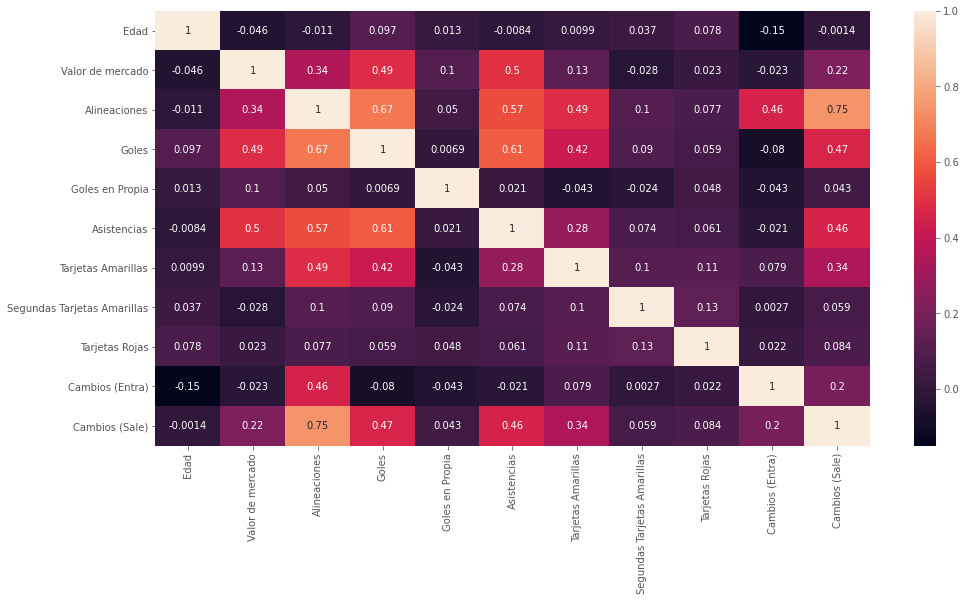

In [ ]:
# Global Execution

# Read Scraping CSV 
data = pd.read_csv("/content/transfer_delanteros(DC).csv")
valor = data.iloc[:,2]

# Clean 'millions' format
for x in range(len(valor)):
  cont = 0
  for i in range(len(valor[x])):
    if (valor[x][i] == 'm' or valor[x][i] == '-' ):
      break
    else:
      cont += 1
  valor[x] = valor[x][0:cont]

# Delete NANs
for x in range(len(valor)):
  for i in range(len(valor[x])):
    if len(valor[x][i])==0:
      valor[x][i]=0

# Replace ','  with '.'
for x in range(len(valor)):
  valor[x] = valor[x].replace(",", ".")

# Get Output
y = pd.to_numeric(valor)
y = y.astype('float')

data['Valor de mercado'] = y
data = data.dropna() # Drop NAs
y = y.dropna()

# Correlation Matrix 
plt.figure(figsize=(16,8))
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.savefig("Correlaciones Pearson.jpg",bbox_inches='tight')
plt.show()

X = data.drop(columns= ['Jugador','Valor de mercado'])

### Process- Step by Step- Do not execute

In [ ]:
# Se quita mill del dataframe

for x in range(len(valor)):
  cont = 0
  for i in range(len(valor[x])):
    if (valor[x][i] == 'm' or valor[x][i] == '-' ):
      break
    else:
      cont += 1
  valor[x] = valor[x][0:cont]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
# Elimina valores nulos
for x in range(len(valor)):
  for i in range(len(valor[x])):
    if len(valor[x][i])==0:
      valor[x][i]=0

In [ ]:
# Se quita mill del dataframe
for x in range(len(valor)):
  valor[x] = valor[x][0:4]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# Se quitan las comas
for x in range(len(valor)):
  valor[x] = valor[x].replace(",", ".")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# Se obtiene el output
y = pd.to_numeric(valor)
y = y.astype('float')

In [ ]:
data.columns

Index(['Jugador', 'Edad', 'Valor de mercado', 'Alineaciones', 'Goles',
       'Goles en Propia', 'Asistencias', 'Tarjetas Amarillas',
       'Segundas Tarjetas Amarillas', 'Tarjetas Rojas', 'Cambios (Entra)',
       'Cambios (Sale)'],
      dtype='object')

In [ ]:
data['Valor de mercado'] = y
data = data.dropna() # Elimina Nas
y = y.dropna()

In [ ]:
data

,Jugador,Edad,Valor de mercado,Alineaciones,Goles,Goles en Propia,Asistencias,Tarjetas Amarillas,Segundas Tarjetas Amarillas,Tarjetas Rojas,Cambios (Entra),Cambios (Sale)
0,Kylian Mbappé,22,160.0,48,36,0,12,6,0,0,9,13
1,Harry Kane,27,120.0,50,31,0,18,3,0,0,7,10
2,Erling Haaland,20,110.0,42,39,0,11,5,0,0,1,12
3,Romelu Lukaku,27,90.0,44,34,0,9,7,0,0,4,8
4,Lautaro Martínez,23,70.0,44,19,0,10,4,0,0,9,26
...,...,...,...,...,...,...,...,...,...,...,...,...
495,Nikola Kalinic,33,2.5,13,1,0,0,0,0,0,2,10
496,Stefano Okaka,31,2.5,16,3,0,1,1,0,0,7,4
497,Bafétimbi Gomis,35,2.5,28,18,0,4,2,0,0,3,7
498,Michael Estrada,25,2.4,36,13,0,3,3,0,0,10,21


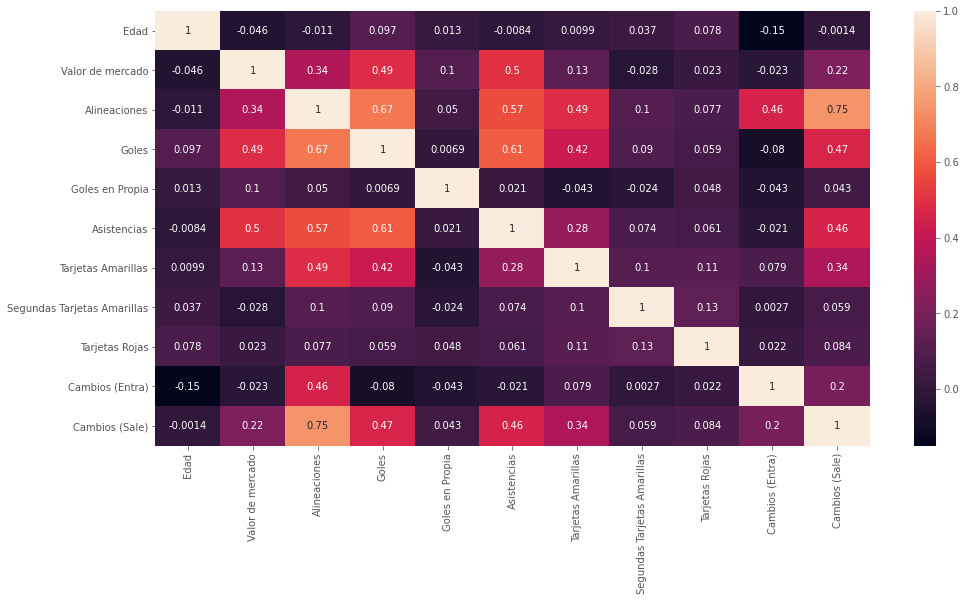

In [ ]:
# matriz correlaciones

plt.figure(figsize=(16,8))
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.savefig("Correlaciones Pearson.jpg",bbox_inches='tight')
plt.show()

In [ ]:
X = data.drop(columns= ['Jugador','Valor de mercado'])

### Optional

--- In case of filtering by Correlation. This doesn't improve traning model.

--- En caso de querer filtar por correlaciones se podría eliminar información, pero no es recomendable puesto que el entrenamiento del modelo no mejora



In [ ]:
# Se obtienen los inputs
# Se quitan las variables que no están correlacionadas con el valor : 'Tarjetas Amarillas',
#       'Segundas Tarjetas Amarillas', 'Tarjetas Rojas', 'Cambios (Entra)',
#       'Cambios (Sale)'

X = data.drop(columns= ['Jugador','Valor de mercado','Goles en Propia','Tarjetas Amarillas',
       'Segundas Tarjetas Amarillas', 'Tarjetas Rojas', 'Cambios (Entra)',
       'Cambios (Sale)'])

In [ ]:
data = data.drop(columns= ['Jugador','Goles en Propia','Tarjetas Amarillas',
       'Segundas Tarjetas Amarillas', 'Tarjetas Rojas', 'Cambios (Entra)',
       'Cambios (Sale)'])

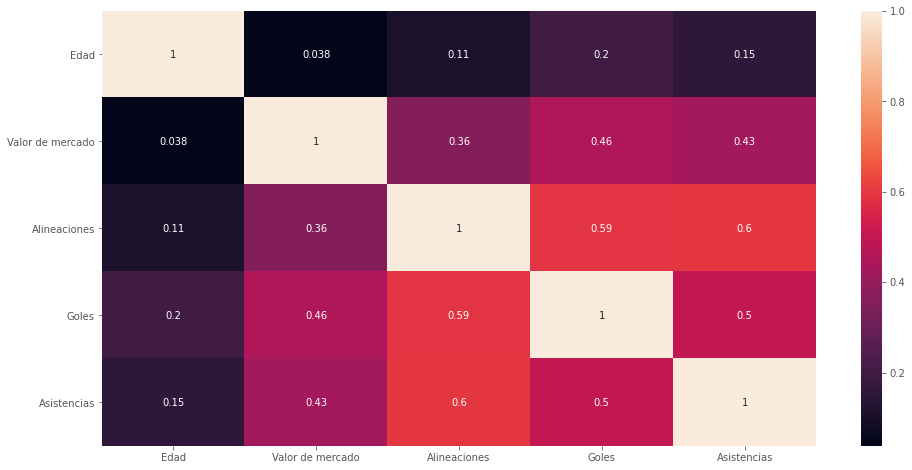

In [ ]:
plt.figure(figsize=(16,8))
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.savefig("Correlaciones Pearson.jpg",bbox_inches='tight')
plt.show()

In [ ]:
X

,Edad,Alineaciones,Goles,Asistencias
0,22,48,36,12
1,27,50,31,18
2,20,42,39,11
3,28,44,28,4
4,29,24,16,10
...,...,...,...,...
495,27,15,1,0
496,26,36,4,4
497,26,20,5,0
498,27,24,4,0


# Train

## Train Without Normalize Data

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X,y, test_size=0.3)

# Neural Network
model1 = keras.Sequential([
      layers.Dense(13, input_shape=(10,), activation='relu'), 
      layers.Dense(5,  activation='relu'),                 
      layers.Dense(1, activation='linear')
    ])

In [ ]:
# Adam Optimizer
from keras import optimizers 
opt = optimizers.Adam(learning_rate=0.01)

model1.compile(loss='mse', optimizer=opt ,metrics=['mae','mse'])

Epoch 1/150
40/40 [==============================] - 1s 9ms/step - loss: 354.4596 - mae: 8.4899 - mse: 354.4596 - val_loss: 127.8407 - val_mae: 6.7325 - val_mse: 127.8407
Epoch 2/150
40/40 [==============================] - 0s 3ms/step - loss: 134.2060 - mae: 6.0389 - mse: 134.2060 - val_loss: 139.0992 - val_mae: 8.6764 - val_mse: 139.0992
Epoch 3/150
40/40 [==============================] - 0s 3ms/step - loss: 183.7421 - mae: 7.3924 - mse: 183.7421 - val_loss: 147.6321 - val_mae: 8.1929 - val_mse: 147.6321
Epoch 4/150
40/40 [==============================] - 0s 3ms/step - loss: 171.0212 - mae: 6.9951 - mse: 171.0212 - val_loss: 134.0329 - val_mae: 6.9316 - val_mse: 134.0329
Epoch 5/150
40/40 [==============================] - 0s 3ms/step - loss: 137.5587 - mae: 6.0947 - mse: 137.5587 - val_loss: 159.9601 - val_mae: 8.1452 - val_mse: 159.9601
Epoch 6/150
40/40 [==============================] - 0s 3ms/step - loss: 103.4482 - mae: 6.2403 - mse: 103.4482 - val_loss: 189.6263 - val_mae: 9

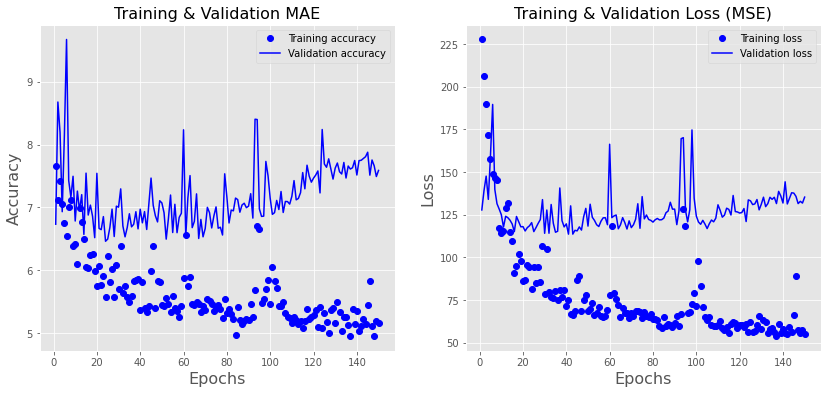

In [ ]:
# Training loop 
n_epochs = 150
history1 = model1.fit(
  X1_train, y1_train, batch_size=8,
  epochs=n_epochs, validation_split = 0.1, verbose=1)

train_validation(history1, y1_train)

Error medio abs : 7.10 , Error porcent. absol: 0.815 
Error Cuadrático : 7.411017706169789
Porcentaje error media- cuadrático : 29.37


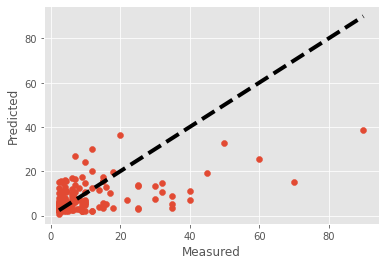

In [ ]:
# Regression Plot
y1_pred= model1.predict(X1_test)
scatter_pred (y1_test,y1_pred,history1)

In [ ]:
# Save model
model1.save('model1.h5')

## Train with normalize data

In [ ]:
# Normalize inputs
X = norm_scaler(X)

(array([[ 47., 196., 189.,  64.,   4.,   0.,   0.,   0.,   0.,   0.],
        [ 71., 116., 251.,  61.,   1.,   0.,   0.,   0.,   0.,   0.],
        [  0., 281., 143.,  59.,  13.,   3.,   1.,   0.,   0.,   0.],
        [  0.,   0., 494.,   0.,   0.,   0.,   0.,   0.,   0.,   6.],
        [  0., 286., 127.,  66.,  17.,   3.,   1.,   0.,   0.,   0.],
        [  0., 301., 121.,  58.,  18.,   2.,   0.,   0.,   0.,   0.],
        [  0., 477.,   0.,   0.,   0.,  22.,   0.,   0.,   0.,   1.],
        [  0., 471.,   0.,   0.,   0.,  28.,   0.,   0.,   1.,   0.],
        [ 43., 221., 146.,  78.,  11.,   1.,   0.,   0.,   0.,   0.],
        [ 57., 170., 193.,  68.,  11.,   1.,   0.,   0.,   0.,   0.]]),
 array([-2.42050491, -1.27107725, -0.12164958,  1.02777808,  2.17720574,
         3.32663341,  4.47606107,  5.62548873,  6.7749164 ,  7.92434406,
         9.07377173]),
 <a list of 10 Lists of Patches objects>)

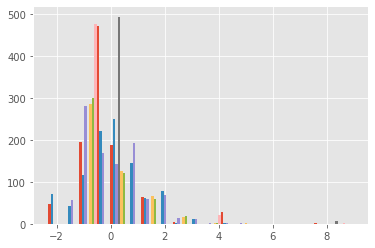

In [ ]:
# Input Histogram
plt.hist(X)

In [ ]:
# Set Neural Network Model
Xnorm_train, Xnorm_test, ynorm_train, ynorm_test = train_test_split(X,y, test_size=0.3)

model_norm = keras.Sequential([
      layers.Dense(13, input_shape=(10,), activation='relu'), 
      layers.Dense(7, activation='relu'),                  
      layers.Dense(1, activation='linear')
    ])

In [ ]:
# Adam Optimizer
from keras import optimizers 
opt = optimizers.Adam(learning_rate=0.01)

model_norm.compile(loss='mse', optimizer=opt ,metrics=['mae','mse'])

Epoch 1/150
35/35 [==============================] - 1s 8ms/step - loss: 305.5635 - mae: 8.2115 - mse: 305.5635 - val_loss: 113.5430 - val_mae: 6.3344 - val_mse: 113.5430
Epoch 2/150
35/35 [==============================] - 0s 3ms/step - loss: 200.6388 - mae: 6.9177 - mse: 200.6388 - val_loss: 136.7903 - val_mae: 7.7944 - val_mse: 136.7903
Epoch 3/150
35/35 [==============================] - 0s 3ms/step - loss: 98.5814 - mae: 5.9309 - mse: 98.5814 - val_loss: 131.9577 - val_mae: 7.7121 - val_mse: 131.9577
Epoch 4/150
35/35 [==============================] - 0s 3ms/step - loss: 114.5684 - mae: 6.4864 - mse: 114.5684 - val_loss: 141.2546 - val_mae: 7.9712 - val_mse: 141.2546
Epoch 5/150
35/35 [==============================] - 0s 3ms/step - loss: 81.8796 - mae: 6.1377 - mse: 81.8796 - val_loss: 123.8428 - val_mae: 7.3629 - val_mse: 123.8428
Epoch 6/150
35/35 [==============================] - 0s 3ms/step - loss: 106.2244 - mae: 5.9561 - mse: 106.2244 - val_loss: 155.5910 - val_mae: 8.385

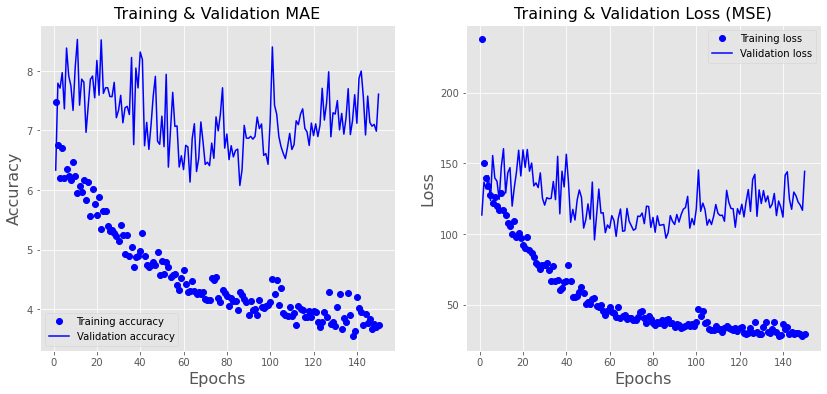

In [ ]:
# Training loop 
n_epochs = 150
history_norm = model_norm.fit(
  Xnorm_train, ynorm_train, batch_size=8,
  epochs=n_epochs, validation_split = 0.1, verbose=1)

train_validation(history_norm, ynorm_train)

Error medio abs : 8.27 , Error porcent. absol: 1.100 
Error Cuadrático : 12.039413575753882
Porcentaje error media- cuadrático : 50.18


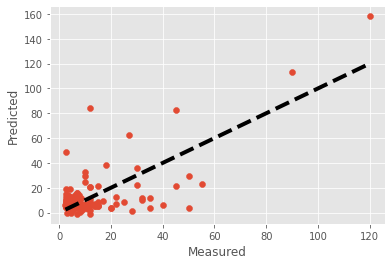

In [ ]:
# Visualize Regression Plot
ynorm_pred= model_norm.predict(Xnorm_test)
scatter_pred (ynorm_test,ynorm_pred,history_norm)

In [ ]:
# Save Model
model_norm.save('model_norm.h5')